# <center style='color:teal'> Rand Index (`RI`) and Adjusted Rand Index (`ARI`) - Example using `iris` dataset </center>

## 1. Import required libraries

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load sklearn's `iris` dataset 

In [2]:
iris = datasets.load_iris()
data = iris.data
targets = iris.target

In [3]:
data.shape # 150 samples and 4 features

(150, 4)

In [4]:
iris.feature_names # the names of 4 features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names # the names of targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So, there are three different targets.

## 3. Create a dataframe

In [6]:
df = pd.DataFrame(data, columns=iris.feature_names)
df['target_names'] = targets # add targets to the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.target_names.value_counts()

0    50
1    50
2    50
Name: target_names, dtype: int64

So, each target (`setosa`, `versicolor` and `virginica`) is present 50 times in the __iris__ dataset.

## 4. Separate features from the dataframe

In [8]:
features = df.iloc[:, :-1]
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
features.shape # same shape as 'data'

(150, 4)

## 5. Perform preprocessing

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

## 6. Scaled dataframe

In [11]:
df_scaled = pd.DataFrame(scaled, columns=iris.feature_names)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
df_scaled.shape

(150, 4)

## 7. Perform K-Means clustering considering 3 clusters

In [13]:
kmeans = KMeans(n_clusters=3, random_state=33, n_init='auto')
kmeans.fit(df_scaled)
preds = kmeans.labels_

## 8. Add two new columns to the scaled dataframe

In [14]:
df_scaled['ground_truth'] = targets
df_scaled['prediction'] = preds
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ground_truth,prediction
0,-0.900681,1.019004,-1.340227,-1.315444,0,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0,0
2,-1.385353,0.328414,-1.397064,-1.315444,0,0
3,-1.506521,0.098217,-1.283389,-1.315444,0,0
4,-1.021849,1.249201,-1.340227,-1.315444,0,0


In [15]:
df_scaled.shape

(150, 6)

In [16]:
print(df_scaled.ground_truth.unique())
print(df_scaled.prediction.unique())

[0 1 2]
[0 2 1]


## 9. Clustering comparison between ground truths and predictions

In [17]:
cm = metrics.confusion_matrix(targets, preds)

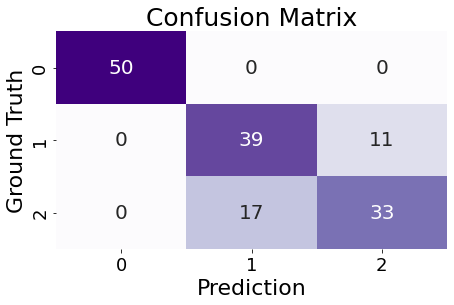

In [18]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', cbar=False, annot_kws={'size': 20}, cmap='Purples')

plt.xlabel('Prediction', fontsize=22)
plt.ylabel('Ground Truth', fontsize=22)
plt.title('Confusion Matrix', fontsize=25)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## 10. Calculate `Rand Index (RI)`

In [19]:
print('Rand Index (Rand Score):', round(metrics.rand_score(targets, preds), 5))

Rand Index (Rand Score): 0.8196


##### The drawback of `Rand Index (RI)` is that it achieves a high score even when the predictions differ significantly from the ground truths.

## 11. Calculate `Adjusted Rand Index (ARI)`

In [20]:
print('Adjusted Rand Index (Adjusted Rand Score):', round(metrics.adjusted_rand_score(targets, preds), 5))

Adjusted Rand Index (Adjusted Rand Score): 0.59233


##### `Adjusted Rand Index (ARI)` takes care of the problem that comes with `Rand Index (RI)`. A random result gets a score of 0 in `ARI`.

#### Higher scores are desired for both `RI` and `ARI`.